## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Open up our CSV files located in the /Data subfolder
salaries_df = pd.read_csv("../Data/nba_salaries_1990_to_2018.csv")
player_data_df = pd.read_csv("../Data/player_data.csv")
players_df = pd.read_csv("../Data/Players.csv")
seasons_stats_df = pd.read_csv("../Data/Seasons_Stats.csv")
salary_cap_df = pd.read_csv("../Data/salary_cap.csv")
draft_pos_df = pd.read_excel("../Data/NBA_Drafts.xlsx")

# For only 2017-2018 players
twitter_df = pd.read_csv("../Data/social-power-nba/nba_2017_twitter_players.csv")
pie_df = pd.read_csv("../Data/social-power-nba/nba_2017_pie.csv")
extra_df = pd.read_csv("../Data/social-power-nba/nba_2017_players_stats_combined.csv")

In [3]:
# Glimpse of our data
salaries_df.head()

,player,salary,season_end,season_start,team,team_name
0,Moses Malone,2406000,1991,1990,ATL,Atlanta Hawks
1,Dominique Wilkins,2065000,1991,1990,ATL,Atlanta Hawks
2,Jon Koncak,1550000,1991,1990,ATL,Atlanta Hawks
3,Doc Rivers,895000,1991,1990,ATL,Atlanta Hawks
4,Rumeal Robinson,800000,1991,1990,ATL,Atlanta Hawks


In [4]:
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [5]:
players_df.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
print(seasons_stats_df.columns)
seasons_stats_df.head()

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [7]:
salary_cap_df.head()

,Season,Nominal,Real
0,1984-85,"$3,600,000","$7,934,034"
1,1985-86,"$4,233,000","$9,153,509"
2,1986-87,"$4,945,000","$10,317,292"
3,1987-88,"$6,164,000","$12,354,015"
4,1988-89,"$7,232,000","$13,829,137"


In [8]:
draft_pos_df = draft_pos_df[['Round', 'Pick', 'Player']]
draft_pos_df.head()

,Round,Pick,Player
0,1,1,Markelle Fultz
1,2,2,Lonzo Ball
2,3,3,Jayson Tatum
3,4,4,Josh Jackson
4,5,5,De'Aaron Fox


In [9]:
twitter_df.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [10]:
pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [11]:
extra_df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


# Clean data

In [12]:
START_YEAR = 2016
END_YEAR = 2018

In [13]:
# We only have salary information from 1990 onwards
clean_player_data_df = player_data_df[(player_data_df['year_end'] >= START_YEAR) & (player_data_df['year_end'] <= END_YEAR)]

In [14]:
clean_seasons_stats_df = seasons_stats_df[(seasons_stats_df['Year'] >= START_YEAR) & (seasons_stats_df['Year'] <= END_YEAR)].drop(['Unnamed: 0', 'blanl', 'blank2'], 'columns')
clean_seasons_stats_df = clean_seasons_stats_df.groupby('Player').apply(lambda x: x.drop_duplicates(subset=['Year'])).reset_index(drop=True)

In [15]:
clean_body_stats_df = players_df[['Player', 'height', 'weight']]

In [16]:
clean_salaries_df = salaries_df.drop(['team', 'team_name'], 'columns')

In [17]:
salary_cap_df['Season'] = salary_cap_df['Season'].str.split("-").str[0].astype(int)
salary_cap_df = salary_cap_df.set_index('Season')
salary_cap_df = salary_cap_df[salary_cap_df.columns[0:]].replace('[\$,]', '', regex=True).astype(float)
salary_cap_df = salary_cap_df.dropna()
salary_cap_df.rename(columns={'Nominal':'salary_cap_nominal', 'Real':'salary_cap_real'}, inplace=True)
salary_cap_df.head()

,salary_cap_nominal,salary_cap_real
Season,,
1984,3600000.0,7934034.0
1985,4233000.0,9153509.0
1986,4945000.0,10317292.0
1987,6164000.0,12354015.0
1988,7232000.0,13829137.0


# Analyzing raw data

### Examining Salary Inflation

In [18]:
salary_cap_df.head()

,salary_cap_nominal,salary_cap_real
Season,,
1984,3600000.0,7934034.0
1985,4233000.0,9153509.0
1986,4945000.0,10317292.0
1987,6164000.0,12354015.0
1988,7232000.0,13829137.0


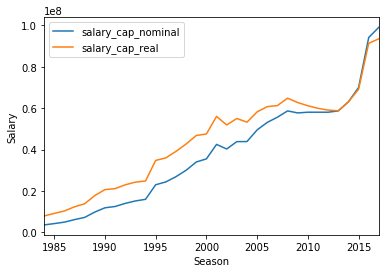

In [19]:
# Looking at the salary cap inflation over time
lines = salary_cap_df.plot.line()
plt.ylabel('Salary')
plt.show()

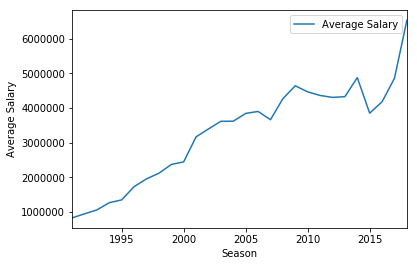

In [20]:
# Get the average salary over the years 1990-2018
avg_salaries = salaries_df.groupby('season_end')['salary', 'season_end'].transform('mean').drop_duplicates()
avg_salaries.columns = ['Average Salary', 'Season']
avg_salaries = avg_salaries.set_index('Season')
avg_salaries.plot.line()
plt.ylabel('Average Salary')
plt.show()

In [21]:
salary_cap_df = pd.concat([salary_cap_df, avg_salaries], axis=1, join_axes=[salary_cap_df.index])
salary_cap_df.head()

,salary_cap_nominal,salary_cap_real,Average Salary
Season,,,
1984,3600000.0,7934034.0,NaN
1985,4233000.0,9153509.0,NaN
1986,4945000.0,10317292.0,NaN
1987,6164000.0,12354015.0,NaN
1988,7232000.0,13829137.0,NaN


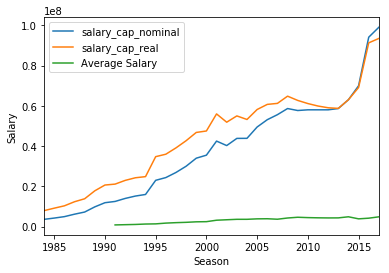

In [22]:
lines = salary_cap_df.plot.line()
plt.ylabel('Salary')
plt.show()

We see that the average salary is much below the salary cap.  This is because the salary cap is the absolute maximum a NBA team can pay their entire roster (before entering the luxury tax), whereas the average salary is for just a single NBA player.  A better comparison would be to compare the relationship between the salary cap inflation and the average salary inflation (and maybe compare to the US inflation).

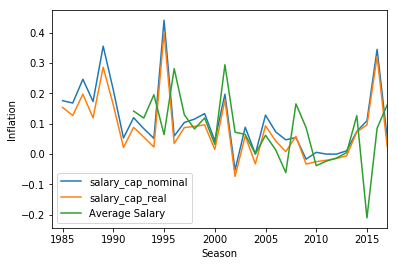

In [23]:
salary_inflation = salary_cap_df.pct_change()
lines = salary_inflation.plot.line()
plt.ylabel('Inflation')
plt.show()

We see that there isn't too strong of a correlation between the inflation in the salary cap and the inflation in player salaries.  In building our models, we will again test if including the particular season's salary cap (instead of just the year) improves our performance.  Our examination of the salary cap and salaries inflation indicates that it may to some extent.

### Examining salary distribution

In this section, we want to examine the distribution of player salaries.

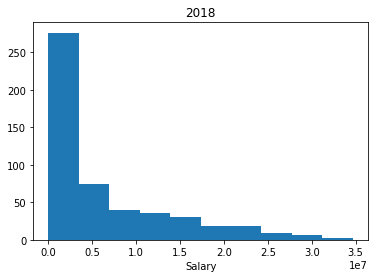

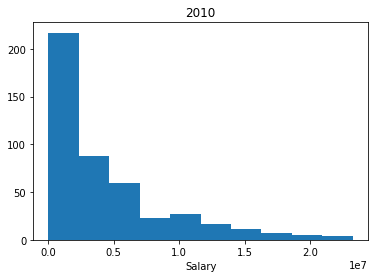

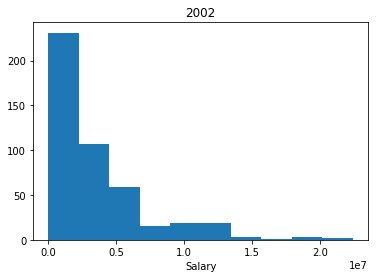

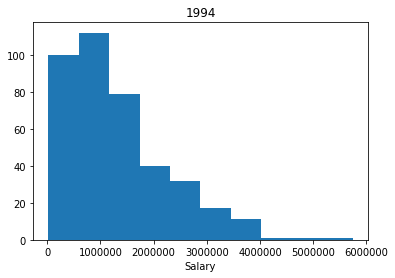

In [24]:
sample_years = [2018,2010,2002,1994]
for year in sample_years:
    salaries = clean_salaries_df[clean_salaries_df['season_end'] == year]['salary']
    plt.hist(salaries)
    plt.xlabel('Salary')
    plt.title(year)
    plt.show()

As we would expect, salaries are quite right-skewed distributions and are becoming increasingly so. We try to make the distribution a bit more "normal":

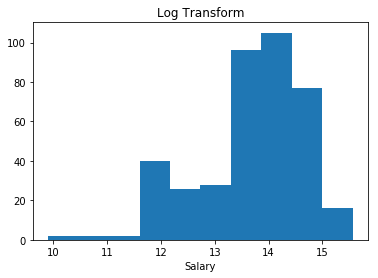

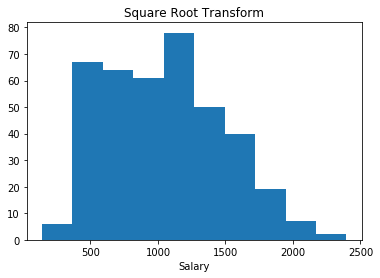

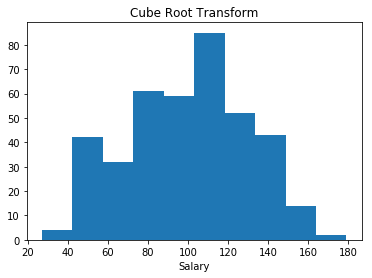

In [25]:
import math
salaries_2006 = clean_salaries_df[clean_salaries_df['season_end'] == 2006]['salary']
plt.hist(salaries.map(math.log))
plt.xlabel('Salary')
plt.title('Log Transform')
plt.show()
plt.hist(salaries.map(math.sqrt))
plt.xlabel('Salary')
plt.title('Square Root Transform')
plt.show()
plt.hist(salaries.map(lambda x: math.pow(x, 1/3)))
plt.xlabel('Salary')
plt.title('Cube Root Transform')
plt.show()

# Transform data

In [26]:
from scipy import stats

In [27]:
features_seasons_stats_df = clean_seasons_stats_df.copy()

In [28]:
features_body_stats_df = clean_body_stats_df.copy()
features_body_stats_df.head()

,Player,height,weight
0,Curly Armstrong,180.0,77.0
1,Cliff Barker,188.0,83.0
2,Leo Barnhorst,193.0,86.0
3,Ed Bartels,196.0,88.0
4,Ralph Beard,178.0,79.0


# Join data

In [29]:
features_salaries_df = clean_salaries_df.copy()
features_salaries_df['cube_root_salary'] = np.cbrt(features_salaries_df['salary']) #.map(lambda x: math.pow(x, 1/3))
features_salaries_df['season_salary_z'] = features_salaries_df.groupby('season_end')['cube_root_salary'].transform(stats.zscore)
features_salaries_df['next_season_salary_z'] = features_salaries_df.groupby('player')['season_salary_z'].shift(-1)
features_salaries_df = features_salaries_df.dropna(subset=['next_season_salary_z'])
features_salaries_df.head()

,player,salary,season_end,season_start,cube_root_salary,season_salary_z,next_season_salary_z
0,Moses Malone,2406000,1991,1990,133.998069,1.895577,0.990715
1,Dominique Wilkins,2065000,1991,1990,127.342494,1.623581,2.102462
2,Jon Koncak,1550000,1991,1990,115.729453,1.148985,1.338753
3,Doc Rivers,895000,1991,1990,96.369812,0.357806,0.572878
4,Rumeal Robinson,800000,1991,1990,92.831777,0.213215,0.368960


In [30]:
features_df = features_seasons_stats_df.merge(features_body_stats_df, how='inner', on='Player')
features_df = features_df.merge(features_salaries_df, how='inner', left_on=['Player', 'Year'], right_on=['player', 'season_end'])

features_df = features_df.merge(draft_pos_df, how='left', left_on=['player'], right_on=['Player'])

features_df = features_df.merge(salary_cap_df, how='inner', left_on=['Year'], right_on=['Season'])

# Get how long they've played so far
year_start_df = player_data_df[['name', 'year_start']]
features_df = features_df.merge(year_start_df, how='left', left_on=['player'], right_on=['name']) # USING INNER HERE MAKES R^2 LOWER????
features_df['years_played'] = features_df['season_end'] - features_df['year_start']

# Pretty much a late 2nd round pick???
features_df['Round'].fillna(2, inplace=True)
features_df['Pick'].fillna(61, inplace=True)

# features_df = features_df.drop(['Year', 'Player'], 'columns').set_index(['player', 'season_end'])
features_df = features_df.drop(['Year', 'Player_x', 'Player_y', 'name', 'year_start'], 'columns').set_index(['player', 'season_end'])

features_df

,,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,season_start,cube_root_salary,season_salary_z,next_season_salary_z,Round,Pick,salary_cap_nominal,salary_cap_real,Average Salary,years_played
player,season_end,,,,,,,,,,,,,,,,,,,,,
A.J. Hammons,2017,C,24.0,DAL,22.0,0.0,163.0,8.4,0.472,0.238,0.476,...,2016,86.623911,-0.733493,-0.793679,2.0,46.0,99093000.0,93532801.0,4.856298e+06,0
Aaron Brooks,2017,PG,32.0,IND,65.0,0.0,894.0,9.5,0.507,0.427,0.133,...,2016,139.247665,0.011589,-0.508784,1.0,26.0,99093000.0,93532801.0,4.856298e+06,9
Aaron Gordon,2017,SF,21.0,ORL,80.0,72.0,2298.0,14.4,0.530,0.309,0.251,...,2016,163.257700,0.351539,0.216812,1.0,4.0,99093000.0,93532801.0,4.856298e+06,2
Al Horford,2017,C,30.0,BOS,68.0,68.0,2193.0,17.7,0.553,0.302,0.169,...,2016,298.286903,2.263372,2.117027,1.0,3.0,99093000.0,93532801.0,4.856298e+06,9
Al Jefferson,2017,C,32.0,IND,66.0,1.0,931.0,18.9,0.526,0.002,0.180,...,2016,217.083964,1.113647,0.777440,1.0,15.0,99093000.0,93532801.0,4.856298e+06,12
Al-Farouq Aminu,2017,SF,26.0,POR,61.0,25.0,1773.0,11.3,0.506,0.455,0.292,...,2016,197.305229,0.833606,0.481835,1.0,8.0,99093000.0,93532801.0,4.856298e+06,6
Alan Anderson,2017,SF,34.0,LAC,30.0,0.0,308.0,5.0,0.494,0.550,0.200,...,2016,109.569891,-0.408609,-1.105054,2.0,61.0,99093000.0,93532801.0,4.856298e+06,11
Alan Williams,2017,C,24.0,PHO,47.0,0.0,708.0,19.5,0.547,0.004,0.419,...,2016,95.633294,-0.605933,0.294359,2.0,61.0,99093000.0,93532801.0,4.856298e+06,1
Alec Burks,2017,SG,25.0,UTA,42.0,0.0,653.0,11.6,0.501,0.306,0.315,...,2016,216.547302,1.106048,0.891550,1.0,12.0,99093000.0,93532801.0,4.856298e+06,5


In [31]:
features_df.columns.tolist()

['Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'height',
 'weight',
 'salary',
 'season_start',
 'cube_root_salary',
 'season_salary_z',
 'next_season_salary_z',
 'Round',
 'Pick',
 'salary_cap_nominal',
 'salary_cap_real',
 'Average Salary',
 'years_played']

# Feature Selection

In [32]:
# [G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, blanl, OWS, DWS, WS, WS/48, blank2, OBPM, DBPM, BPM, VORP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
features = [
 #'Pos',
 'Age',
 #'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'height',
 'weight',
 #'salary',
 #'season_start', # For some reason, this improves certain models?
 #'season_salary_z',
 'salary_cap_nominal',
 'salary_cap_real',
 'Round',
 'Pick',
 'years_played'
]

In [33]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

In [34]:
features_df = features_df.dropna()

X_df = features_df[features]
y_df = features_df["next_season_salary_z"]
#X_df = pd.concat([X_df,pd.get_dummies(X_df['Pos'], prefix='Pos')],axis=1)
#X_df = X_df.drop(['Pos'], axis=1)
#X_df = X_df.drop(['season_salary_z'], axis=1)

# Remove features with low variance (this does nothing???)
sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
sel.fit_transform(X_df)

# reg = ExtraTreesRegressor(n_estimators=100).fit(X_df, y_df)
# reg.feature_importances_
# model = SelectFromModel(clf, prefit=True)
# X_new = model.transform(X)
# X_new.shape

X_df.head()
# list(X_df.columns.values)

,,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV,PF,PTS,height,weight,salary_cap_nominal,salary_cap_real,Round,Pick,years_played
player,season_end,,,,,,,,,,,,,,,,,,,,,
A.J. Hammons,2017,24.0,22.0,0.0,163.0,8.4,0.472,0.238,0.476,5.4,20.9,...,10.0,21.0,48.0,198.0,99.0,99093000.0,93532801.0,2.0,46.0,0
Aaron Brooks,2017,32.0,65.0,0.0,894.0,9.5,0.507,0.427,0.133,2.3,6.3,...,66.0,93.0,322.0,183.0,73.0,99093000.0,93532801.0,1.0,26.0,9
Aaron Gordon,2017,21.0,80.0,72.0,2298.0,14.4,0.530,0.309,0.251,5.3,14.1,...,89.0,172.0,1019.0,206.0,99.0,99093000.0,93532801.0,1.0,4.0,2
Al Horford,2017,30.0,68.0,68.0,2193.0,17.7,0.553,0.302,0.169,4.9,18.6,...,116.0,138.0,952.0,208.0,111.0,99093000.0,93532801.0,1.0,3.0,9
Al Jefferson,2017,32.0,66.0,1.0,931.0,18.9,0.526,0.002,0.180,9.2,24.2,...,33.0,125.0,535.0,208.0,131.0,99093000.0,93532801.0,1.0,15.0,12


In [35]:
# Optionally we can normalize all features (this gives super whack results for the testing/training scores)
# # Get column names first
# names = X_df.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(X_df)
# X_df = pd.DataFrame(scaled_df, columns=names)

# Data partitioning

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = X_df.values
y = y_df.values
y_c = pd.qcut(y, 5, labels=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_c_train, y_c_test = train_test_split(X, y_c, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(547, 53)
(547,)
(235, 53)
(235,)


In [38]:
# GET THE MOST IMPORTANT FEATURES USING DECISION TREE
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor()
clf.fit(X, y)

importances = pd.Series(clf.feature_importances_)
keys = pd.Series(X_df.columns.values)

importances_df = pd.concat([keys, importances], axis=1)
importances_df.columns = ['features', 'importances']
importances_df.set_index('features').sort_values(by=['importances'], ascending=False)

/home1/a/alecwang/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importances
features,
PTS,0.123838
GS,0.106639
2PA,0.058109
FG,0.051612
Pick,0.043853
years_played,0.043494
MP,0.043296
Round,0.028683
TRB,0.027497


# Train

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict

## Basic Regression Models

### Linear Models

In [ ]:
from sklearn import linear_model, svm, kernel_ridge

In [ ]:
# Ordinary Least Squares Regression

ols = linear_model.LinearRegression()
results = cross_validate(ols, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4987872642594251
Average Training Score: 0.6066113210136493


/home1/a/alecwang/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
# Ridge Regression
ridge = linear_model.Ridge()
results = cross_validate(ridge, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.5105471899222744
Average Training Score: 0.601069191486199


In [ ]:
# Lasso Regression
lasso = linear_model.Lasso()
results = cross_validate(lasso, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.47565586184032665
Average Training Score: 0.5049941027635645


In [ ]:
# Elastic Net Regression
reg = linear_model.ElasticNet()
results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.49391816284652423
Average Training Score: 0.5294524190771952


In [ ]:
# Least Angle Regression
reg = linear_model.LassoLars(alpha=.1)
results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: -0.005154242337702763
Average Training Score: 0.0


In [ ]:
# Bayesian Regression
reg = linear_model.BayesianRidge()
results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.5055125036419039
Average Training Score: 0.5475030114985342


In [ ]:
# Automatic Relevance Determination Regression
# Note: This is slow as balls so dont run it...
# reg = linear_model.ARDRegression()
# results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
# print("Average Testing Score: " + str(np.mean(results['test_score'])))
# print("Average Training Score: " + str(np.mean(results['train_score'])))

In [ ]:
# Theil Sen Regression
reg = linear_model.TheilSenRegressor()
results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.47231836315354
Average Training Score: 0.5866079387120284


In [ ]:
reg = linear_model.RANSACRegressor()
results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: -0.56003385754006
Average Training Score: -0.3669288044581715


In [ ]:
reg = linear_model.HuberRegressor()
results = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: -0.0007222143694727734
Average Training Score: 0.007342200841698454


## Advanced Regression Models

In [ ]:
# AdaBoost Regressor
from sklearn import ensemble
clf = ensemble.AdaBoostRegressor()
results = cross_validate(clf, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4849568778006506
Average Training Score: 0.6918348475928369


In [ ]:
# Kernel Ridge Regression
krr = kernel_ridge.KernelRidge(kernel='poly', degree=2)
results = cross_validate(krr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.2654132003690397
Average Training Score: 0.3443058146881484


In [ ]:
# Gaussian Process Regression
from sklearn import gaussian_process
gpr = gaussian_process.GaussianProcessRegressor()
results = cross_validate(gpr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: -0.02403321616710128
Average Training Score: 0.9874324222594264


## Trees

In [87]:
# Decision Tree Regressor
from sklearn import tree
clf = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, min_samples_split=2)
results = cross_validate(clf, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.43390633500167103
Average Training Score: 0.6634938717344225


In [142]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, min_samples_split=25, max_depth=10, criterion='friedman_mse')
results = cross_validate(clf, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.5025916787387782
Average Training Score: 0.7267943553924928


/home1/a/alecwang/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor()
results = cross_validate(clf, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.4740243040722068
Average Training Score: 0.98743242222305


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
results = cross_validate(clf, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.5183344813358052
Average Training Score: 0.6448592477591966


### Neural Network

In [47]:
# Need to tune these parameters...
from sklearn import neural_network
clf = neural_network.MLPRegressor(hidden_layer_sizes=[128,128,64,64,32,32], solver='adam', activation='relu', learning_rate='adaptive', max_iter=500)
results = cross_validate(clf, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))
results

Average Testing Score: -39767745.18654578
Average Training Score: -39622620.94434124


{'fit_time': array([0.66936898, 0.51507568, 0.51384091, 0.61860228, 0.59807587]),
 'score_time': array([0.00063753, 0.00075245, 0.0011313 , 0.00067735, 0.00073195]),
 'test_score': array([ -4597440.55444884,   -621451.12505447, -89534240.18834908,
        -58446116.34793059, -45639477.71694592]),
 'train_score': array([ -5047195.91138385,   -551149.50865621, -87453210.32509446,
        -70171272.36706068, -34890276.609511  ])}

### Nearest Neighbors

In [ ]:
from sklearn import neighbors

In [ ]:
n_neighbors = 25
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance', p=1)
results = cross_validate(knn, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.41510656526452216
Average Training Score: 0.9874324222594304


In [ ]:
# Bagging Regressor for Nearest Neighbors
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Can tune these
knn = KNeighborsRegressor()
bagging = BaggingRegressor(knn, max_samples=0.5, max_features=0.5)
results = cross_validate(bagging, X_train, y_train, scoring='r2', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.42261316905652746
Average Training Score: 0.5285685149247099


### SVR

In [ ]:
linear_svr = svm.SVR(kernel='linear')
cross_validate(linear_svr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)

In [ ]:
rbf_svr = svm.SVR(kernel='rbf', gamma='scale')
cross_validate(rbf_svr, X_train, y_train, scoring='r2', cv=5, n_jobs=5)

## Classification Models

### SVC

In [40]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear')
results = cross_validate(linear_svc, X_train, y_c_train, scoring='accuracy', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

KeyboardInterrupt: 

In [50]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
results = cross_validate(lr, X_train, y_c_train, scoring='accuracy', cv=5, n_jobs=5)
print("Average Testing Score: " + str(np.mean(results['test_score'])))
print("Average Training Score: " + str(np.mean(results['train_score'])))

Average Testing Score: 0.2506593169209992
Average Training Score: 0.25959806687388165


/home1/a/alecwang/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Principal Component Analysis

## Setting up PCA

In [ ]:
# Have to collapse rows to not have repeated names
new_features_df = features_df.copy()
#new_features_df.index = new_features_df.index.droplevel(2)
new_features_df = new_features_df.reset_index()
new_features_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

if 'Pos' in features:
    features.remove('Pos')

# Separating out the features

x = new_features_df.loc[:, features].values
# Separating out the target
y = new_features_df.loc[:,['next_season_salary_z']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, new_features_df[['next_season_salary_z']]], axis = 1)
finalDf.head()

## Further PCA Experimentation

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# TODO: 3-Plot of the 2 components and the salary

In [ ]:
# Explained variance for each component
pca.explained_variance_ratio_

## Models using PCA

In [ ]:
# TODO

# KMeans Clustering

In [51]:
from sklearn import cluster

In [59]:
kmeans = cluster.KMeans(n_clusters=8).fit(X)


In [60]:
clusters = pd.DataFrame(kmeans.cluster_centers_)

In [61]:
clusters.columns = features

In [62]:
clusters

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV,PF,PTS,height,weight,salary_cap_nominal,salary_cap_real,Round,Pick,years_played
0,26.479592,72.551020,47.346939,2007.959184,14.935714,0.540133,0.263684,0.277796,5.195918,15.643878,...,110.795918,160.316327,831.428571,200.489796,98.744898,94143000.0,91334866.0,1.265306,21.224490,5.540816
1,27.219355,66.729032,24.916129,1418.703226,12.667742,0.540748,0.361955,0.230432,4.137419,14.394194,...,72.477419,124.258065,528.341935,200.103226,97.819355,99093000.0,93532801.0,1.393548,27.400000,5.903226
2,26.592920,31.831858,3.823009,386.584071,11.173451,0.505929,0.315080,0.293681,4.566372,14.007080,...,20.566372,38.256637,129.353982,200.123894,98.442478,94143000.0,91334866.0,1.477876,32.451327,4.637168
3,25.640000,77.240000,77.160000,2714.040000,22.608000,0.578160,0.290880,0.347520,3.676000,15.300000,...,222.360000,177.080000,1889.960000,198.240000,95.760000,99093000.0,93532801.0,1.080000,11.480000,5.400000
4,26.503497,29.657343,3.496503,383.153846,10.638462,0.507531,0.337245,0.288070,4.515385,13.596503,...,18.776224,36.293706,131.993007,198.965035,96.139860,99093000.0,93532801.0,1.559441,36.951049,5.195804
5,26.352941,74.682353,57.164706,2239.835294,16.263529,0.558859,0.301506,0.282212,5.222353,16.582353,...,118.270588,167.082353,1016.341176,200.882353,99.329412,99093000.0,93532801.0,1.211765,19.729412,6.211765
6,26.166667,77.666667,74.562500,2624.187500,18.931250,0.555792,0.303146,0.294896,3.700000,14.725000,...,177.645833,176.937500,1434.312500,198.812500,95.979167,94143000.0,91334866.0,1.166667,16.416667,5.750000
7,27.356522,62.791304,14.052174,1192.121739,12.768696,0.531174,0.336435,0.231470,4.261739,14.155652,...,62.226087,110.800000,446.330435,199.434783,97.400000,94143000.0,91334866.0,1.295652,25.765217,6.947826


0.6091498285505388


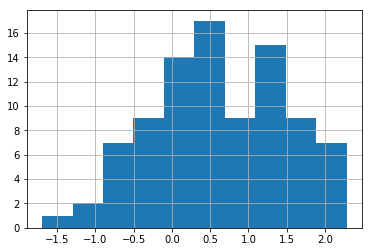

0.015359961351859932


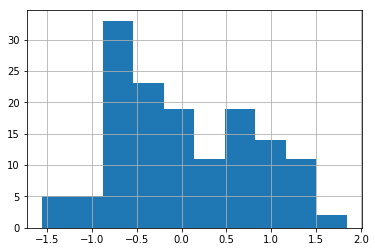

-0.38834007809373355


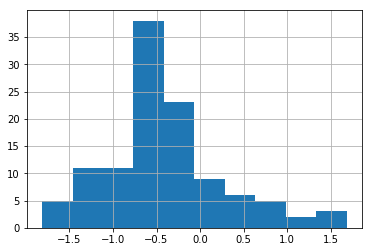

1.5492224512532335


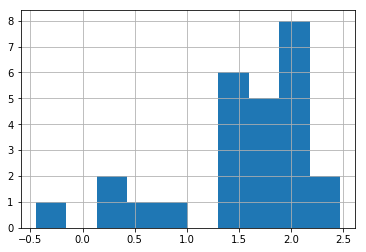

-0.5556232946257339


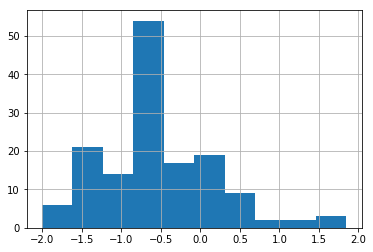

0.850085269403108


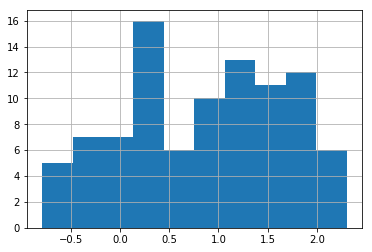

1.3595926412807053


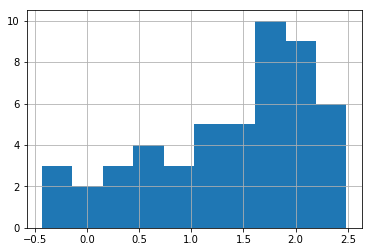

0.04399490831454331


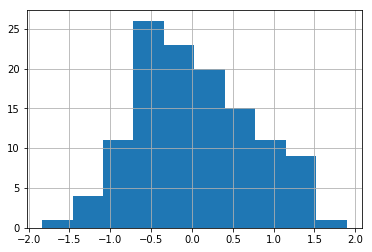

In [71]:
for i in range(8):
    y_df[kmeans.labels_ == i].hist()
    print(y_df[kmeans.labels_ == i].mean())
    plt.show()

In [77]:
y_df[kmeans.labels_ == 3].sort_values()

player                 season_end
Devin Booker           2017         -0.448999
Karl-Anthony Towns     2017          0.326948
Isaiah Thomas          2017          0.333550
Andrew Wiggins         2017          0.515456
Kemba Walker           2017          1.005910
Dennis Schroder        2017          1.313074
Goran Dragic           2017          1.430567
Klay Thompson          2017          1.492294
DeMarcus Cousins       2017          1.509709
John Wall              2017          1.509709
Kawhi Leonard          2017          1.567562
Jimmy Butler           2017          1.597971
Paul George            2017          1.612428
Giannis Antetokounmpo  2017          1.808149
Marc Gasol             2017          1.818870
Harrison Barnes        2017          1.848137
Bradley Beal           2017          1.888816
Anthony Davis          2017          1.888816
C.J. McCollum          2017          1.900148
Damian Lillard         2017          2.028654
Carmelo Anthony        2017          2.033818


In [67]:
y_df[kmeans.labels_ == 4].sort_values()

player               season_end
Quinn Cook           2017         -2.002691
Beno Udrih           2017         -2.002691
Briante Weber        2017         -1.888192
Demetrius Jackson    2017         -1.760992
Georges Niang        2017         -1.743932
K.J. McDaniels       2017         -1.743932
Isaiah Canaan        2017         -1.562176
Jordan McRae         2017         -1.548395
Marcus Georges-Hunt  2017         -1.510608
Jordan Crawford      2017         -1.494145
Alex Poythress       2017         -1.480220
Reggie Williams      2017         -1.438363
Jarrod Uthoff        2017         -1.438363
Reggie Williams      2017         -1.438363
                     2017         -1.376411
                     2017         -1.376411
Chris Andersen       2017         -1.355597
Quinn Cook           2017         -1.350092
Archie Goodwin       2017         -1.312569
Lamar Patterson      2017         -1.302785
Briante Weber        2017         -1.296497
Ronnie Price         2017         -1.260043


In [68]:
y_df[kmeans.labels_ == 5].sort_values()

player                    season_end
Malcolm Brogdon           2017         -0.793679
Nikola Jokic              2017         -0.729686
T.J. McConnell            2017         -0.729686
Sean Kilpatrick           2017         -0.709383
Tony Allen                2017         -0.508784
Dario Saric               2017         -0.419850
Marcus Morris             2017         -0.383321
Myles Turner              2017         -0.379629
Frank Kaminsky            2017         -0.307833
Seth Curry                2017         -0.263562
T.J. Warren               2017         -0.234088
Elfrid Payton             2017         -0.192957
Buddy Hield               2017         -0.118228
Nik Stauskas              2017         -0.090791
Julius Randle             2017         -0.022342
Jamal Crawford            2017          0.011935
Kristaps Porzingis        2017          0.044700
Marcus Smart              2017          0.051022
Jameer Nelson             2017          0.086788
Chris Paul                2017  